In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [35]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 25

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/values_estimation_blp_secondtry_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.info())


combined_df = combined_df[(combined_df['sigma_rcl'] >= 0.03)
                          & (combined_df['sigma_blp'] >= 0.03)
                          & (combined_df['a_blp'] >= -5)
                          & (combined_df['a_rcl'] >= -5)]
print(combined_df.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   b2_ols             25 non-null     float64
 1   b3_ols             25 non-null     float64
 2   a_ols              25 non-null     float64
 3   b1_ols             25 non-null     float64
 4   a_iv               25 non-null     float64
 5   b2_iv              25 non-null     float64
 6   b3_iv              25 non-null     float64
 7   b1_iv              25 non-null     float64
 8   b1_blp             25 non-null     float64
 9   b2_blp             25 non-null     float64
 10  b3_blp             25 non-null     float64
 11  a_blp              25 non-null     float64
 12  sigma_blp          25 non-null     float64
 13  sigma_rcl          25 non-null     float64
 14  a_rcl              25 non-null     float64
 15  b2_rcl             25 non-null     float64
 16  b3_rcl             25 non-nu

In [36]:

from scipy.stats import ttest_1samp

# all the values from the blp 
t1= ttest_1samp(combined_df['b1_blp'], 2)
t2 = ttest_1samp(combined_df['b2_blp'], -0.3)
t3 = ttest_1samp(combined_df['b3_blp'], -0.3)
t4 = ttest_1samp(combined_df['a_blp'], -1.682)
t5 = ttest_1samp(combined_df['sigma_blp'], 0.340)


# all the values from the rcl 
t6 = ttest_1samp(combined_df['b1_rcl'], 2)
t7 = ttest_1samp(combined_df['b2_rcl'], -0.3)
t8 = ttest_1samp(combined_df['b3_rcl'], -0.3)
t9 = ttest_1samp(combined_df['a_rcl'], -1.682)
t10 = ttest_1samp(combined_df['sigma_rcl'], 0.340)


print(f"{t1}")
print(f"{t2}")
print(f"{t3}")
print(f"{t4}")
print(f"{t5}")
print(f"{t6}")
print(f"{t7}")
print(f"{t8}")
print(f"{t9}")
print(f"{t10}")

TtestResult(statistic=-inf, pvalue=0.0, df=24)
TtestResult(statistic=inf, pvalue=0.0, df=24)
TtestResult(statistic=inf, pvalue=0.0, df=24)
TtestResult(statistic=inf, pvalue=0.0, df=24)
TtestResult(statistic=-8.514324520358493e+16, pvalue=0.0, df=24)
TtestResult(statistic=-inf, pvalue=0.0, df=24)
TtestResult(statistic=inf, pvalue=0.0, df=24)
TtestResult(statistic=inf, pvalue=0.0, df=24)
TtestResult(statistic=5340817804522165.0, pvalue=0.0, df=24)
TtestResult(statistic=-inf, pvalue=0.0, df=24)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


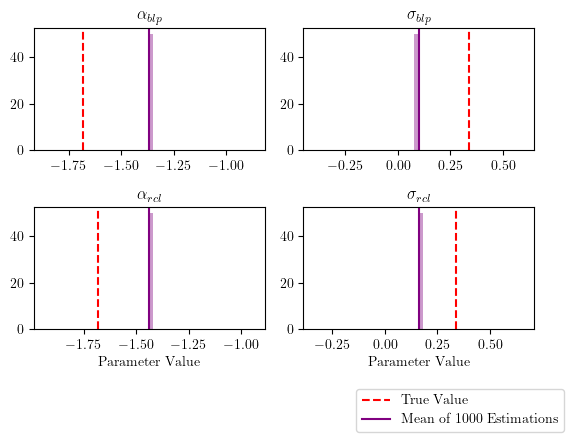

In [37]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

purple_color = 'purple'

ax[0, 0].hist(combined_df['a_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[0, 0].axvline(np.mean(combined_df['a_blp']), color=purple_color)
ax[0, 0].set_title('$\\alpha_{blp}$')

ax[0, 1].hist(combined_df['sigma_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[0, 1].axvline(np.mean(combined_df['sigma_blp']), color=purple_color)
ax[0, 1].set_title('$\\sigma_{blp}$')

ax[1, 0].hist(combined_df['a_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[1, 0].axvline(np.mean(combined_df['a_rcl']), color=purple_color)
ax[1, 0].set_title('$\\alpha_{rcl}$')
ax[1, 0].set_xlabel('Parameter Value')


ax[1, 1].hist(combined_df['sigma_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[1, 1].axvline(np.mean(combined_df['sigma_rcl']), color=purple_color)
ax[1, 1].set_title('$\\sigma_{rcl}$')
ax[1, 1].set_xlabel('Parameter Value')

legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='True Value'),
    plt.Line2D([0], [0], color=purple_color, label='Mean of 1000 Estimations')
]
leg = plt.legend(handles=legend_elements,
            loc='lower left',
            bbox_to_anchor=(0.2, -0.9))

# fig.subplots_adjust(bottom=0.78)
plt.tight_layout()

plt.savefig('../plots/estimation_results_demand_side.pdf')
plt.show()

In [38]:
combined_df.mean()


b2_ols               -0.297702
b3_ols               -0.297067
a_ols                -1.313016
b1_ols                1.206402
a_iv                 -1.323148
b2_iv                -0.299350
b3_iv                -0.298821
b1_iv                 1.264290
b1_blp                1.368617
b2_blp               -0.299511
b3_blp               -0.299075
a_blp                -1.367498
sigma_blp             0.098807
sigma_rcl             0.160669
a_rcl                -1.439929
b2_rcl               -0.299767
b3_rcl               -0.299476
b1_rcl                1.538447
simulation_number    13.000000
dtype: float64

In [39]:


# Define the parameters and their corresponding values for t-tests
parameters = {
    'b1': {'BLP': 2, 'RCL': 2},
    'b2': {'BLP': -0.3, 'RCL': -0.3},
    'b3': {'BLP': -0.3, 'RCL': -0.3},
    'a': {'BLP': -1.682, 'RCL': -1.682},
    'sigma': {'BLP': 0.34, 'RCL': 0.34}
}

# Perform t-tests and store the results
t_test_results = {}
for param, values in parameters.items():
    t_test_results[param] = {
        'BLP': ttest_1samp(combined_df[param + '_blp'], values['BLP']),
        'RCL': ttest_1samp(combined_df[param + '_rcl'], values['RCL'])
    }

# Generate LaTeX code for the table
table_tex = r'''
\begin{table}[htbp]
\centering
\caption{T-Test Results for BLP and RLC Estimations}
\label{tab:t_test_results}
\begin{tabular}{lcc}
\hline
\textbf{Parameter} & \textbf{BLP} & \textbf{RLC} \\
\hline
'''
for param, results in t_test_results.items():
    row_tex = f"{param} & {results['BLP'].statistic:.3f}, {results['BLP'].pvalue:.3f} & {results['RCL'].statistic:.3f}, {results['RCL'].pvalue:.3f} \\\\"
    table_tex += row_tex + '\n'
table_tex += r'''
\hline
\end{tabular}
\end{table}
'''

# Print the generated LaTeX code
print(table_tex)


\begin{table}[htbp]
\centering
\caption{T-Test Results for BLP and RLC Estimations}
\label{tab:t_test_results}
\begin{tabular}{lcc}
\hline
\textbf{Parameter} & \textbf{BLP} & \textbf{RLC} \\
\hline
b1 & -inf, 0.000 & -inf, 0.000 \\
b2 & inf, 0.000 & inf, 0.000 \\
b3 & inf, 0.000 & inf, 0.000 \\
a & inf, 0.000 & 5340817804522165.000, 0.000 \\
sigma & -85143245203584928.000, 0.000 & -inf, 0.000 \\

\hline
\end{tabular}
\end{table}



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
